In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
df = pd.read_csv('/content/smoking_driking_dataset_Ver01.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [ ]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [ ]:
class_counts = df['DRK_YN'].value_counts()
print(class_counts)

DRK_YN
N    90245
Y    90019
Name: count, dtype: int64


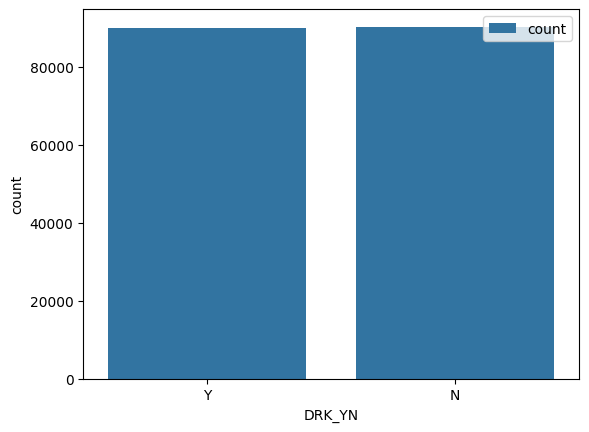

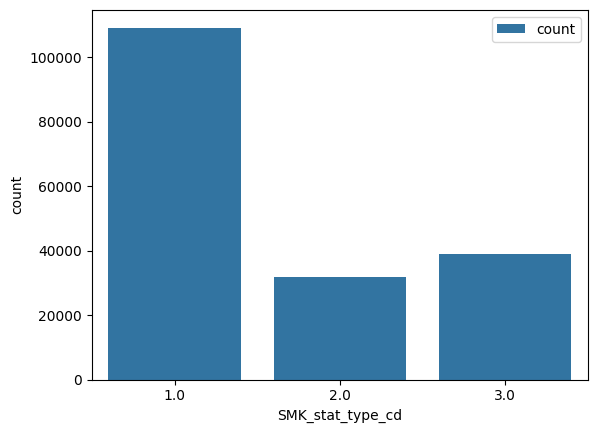

In [ ]:
sns.countplot(x = 'DRK_YN', data=df, label='count')
plt.show()

sns.countplot(x = 'SMK_stat_type_cd', data=df, label='count')
plt.show()

In [ ]:
df['sex'].value_counts()

sex
Male      95826
Female    84439
Name: count, dtype: int64

Percentage of male who drink: 67.2 %
Percentage of female who drink: 30.3 %
Percentage of male who smoke: 37.7 %
Percentage of female who smoke: 3.5 %


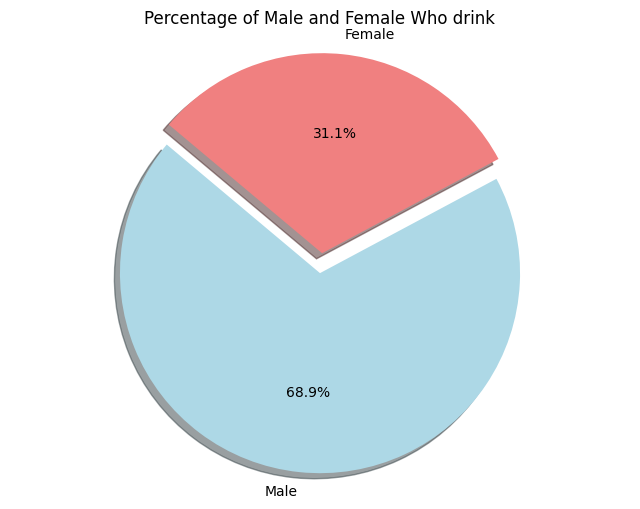

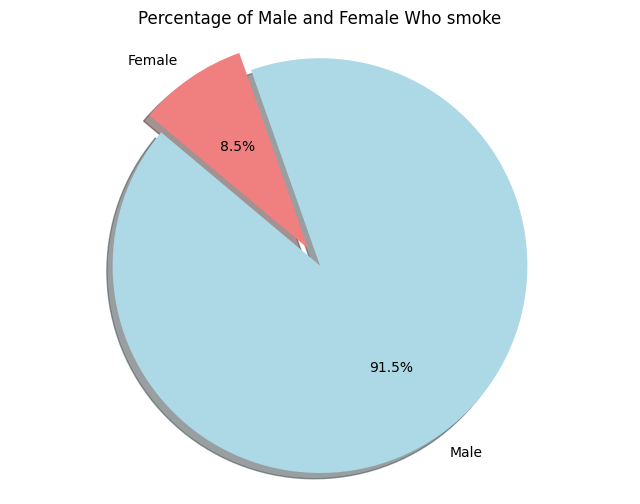

In [ ]:
male_df = df[df['sex'] == 'Male']
female_df = df[df['sex'] == 'Female']

total_male = len(male_df)
total_female = len(female_df)

male_drink = len(male_df[male_df['DRK_YN']=='Y'])
female_drink = len(female_df[female_df['DRK_YN']=='Y'])

male_smoke = len(male_df[male_df['SMK_stat_type_cd']==3])
female_smoke = len(female_df[female_df['SMK_stat_type_cd']== 3])

percentage_of_male_drink = '{:.1f}'.format((male_drink/total_male)*100)
percentage_of_female_drink = '{:.1f}'.format((female_drink/total_female)*100)

print('Percentage of male who drink:', percentage_of_male_drink,'%')
print('Percentage of female who drink:', percentage_of_female_drink,'%')

percentage_of_male_smoke = '{:.1f}'.format((male_smoke/total_male)*100)
percentage_of_female_smoke = '{:.1f}'.format((female_smoke/total_female)*100)

print('Percentage of male who smoke:', percentage_of_male_smoke,'%')
print('Percentage of female who smoke:', percentage_of_female_smoke,'%')

labels = ['Male', 'Female']
sizes = [percentage_of_male_drink, percentage_of_female_drink]
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Male and Female Who drink')
plt.axis('equal')
plt.show()

labels = ['Male', 'Female']
sizes = [percentage_of_male_smoke, percentage_of_female_smoke]
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Male and Female Who smoke')
plt.axis('equal')
plt.show()

In [ ]:
male_smoke_counts = male_df['SMK_stat_type_cd'].value_counts()
female_smoke_counts = female_df['SMK_stat_type_cd'].value_counts()

male_current_smoker = male_smoke_counts.get(3,0)
male_past_smoker = male_smoke_counts.get(2,0)
male_never_smoke = male_smoke_counts.get(1,0)

female_current_smoker = female_smoke_counts.get(3,0)
female_past_smoker = female_smoke_counts.get(2,0)
female_never_smoke = female_smoke_counts.get(1,0)

print('Number of male who currently smoke:', male_current_smoker)
print('Number of male who quit smoking:', male_past_smoker)
print('Number of male who never smoked:', male_never_smoke)

print('Number of female who currently smoke:', female_current_smoker)
print('Number of female who quit smoking:', female_past_smoker)
print('Number of female who never smoked:', female_never_smoke)

Number of male who currently smoke: 36085
Number of male who quit smoking: 29969
Number of male who never smoked: 29772
Number of female who currently smoke: 2935
Number of female who quit smoking: 2019
Number of female who never smoked: 79484


In [ ]:
df.shape

(180265, 24)

In [ ]:
features = df.shape[1]
print(features)

24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180265 entries, 0 to 180264
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               180265 non-null  object 
 1   age               180265 non-null  int64  
 2   height            180265 non-null  int64  
 3   weight            180265 non-null  int64  
 4   waistline         180265 non-null  float64
 5   sight_left        180265 non-null  float64
 6   sight_right       180265 non-null  float64
 7   hear_left         180265 non-null  float64
 8   hear_right        180265 non-null  float64
 9   SBP               180265 non-null  float64
 10  DBP               180265 non-null  float64
 11  BLDS              180265 non-null  float64
 12  tot_chole         180265 non-null  float64
 13  HDL_chole         180265 non-null  float64
 14  LDL_chole         180264 non-null  float64
 15  triglyceride      180264 non-null  float64
 16  hemoglobin        18

In [ ]:
df1 = df.copy()
df1['sex'] = df['sex'].apply(lambda x: 1 if x=='Male' else 0)
df1['DRK_YN'] = df['DRK_YN'].apply(lambda x:1 if x=='Y' else 0)
df1['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].apply(lambda x:1 if x== 3 else 0)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180265 entries, 0 to 180264
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               180265 non-null  int64  
 1   age               180265 non-null  int64  
 2   height            180265 non-null  int64  
 3   weight            180265 non-null  int64  
 4   waistline         180265 non-null  float64
 5   sight_left        180265 non-null  float64
 6   sight_right       180265 non-null  float64
 7   hear_left         180265 non-null  float64
 8   hear_right        180265 non-null  float64
 9   SBP               180265 non-null  float64
 10  DBP               180265 non-null  float64
 11  BLDS              180265 non-null  float64
 12  tot_chole         180265 non-null  float64
 13  HDL_chole         180265 non-null  float64
 14  LDL_chole         180264 non-null  float64
 15  triglyceride      180264 non-null  float64
 16  hemoglobin        18

In [ ]:
df1.isnull().sum()
total_null_values = df1.isnull().sum().sum()
print('Total null values:', total_null_values)

Total null values: 0


In [ ]:
int(df['LDL_chole'].mean())
int(df['triglyceride'].mean())
int(df['hemoglobin'].mean())
int(df['urine_protein'].mean())
int(df['serum_creatinine'].mean())
int(df['SGOT_AST'].mean())
int(df['SGOT_ALT'].mean())
int(df['gamma_GTP'].mean())
int(df['SMK_stat_type_cd'].mean())

1

In [ ]:
df1['LDL_chole'] = df1['LDL_chole'].fillna(np.mean(df1['LDL_chole']))
df1['triglyceride'] = df1['triglyceride'].fillna(np.mean(df1['triglyceride']))
df1['hemoglobin'] = df1['hemoglobin'].fillna(np.mean(df1['hemoglobin']))
df1['urine_protein'] = df1['urine_protein'].fillna(np.mean(df1['urine_protein']))
df1['serum_creatinine'] = df1['serum_creatinine'].fillna(np.mean(df1['serum_creatinine']))
df1['SGOT_AST'] = df1['SGOT_AST'].fillna(np.mean(df1['SGOT_AST']))
df1['SGOT_ALT'] = df1['SGOT_ALT'].fillna(np.mean(df1['SGOT_ALT']))
df1['gamma_GTP'] = df1['gamma_GTP'].fillna(np.mean(df1['gamma_GTP']))
df1['SMK_stat_type_cd'] = df1['SMK_stat_type_cd'].fillna(np.mean(df1['SMK_stat_type_cd']))



In [ ]:
df1.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

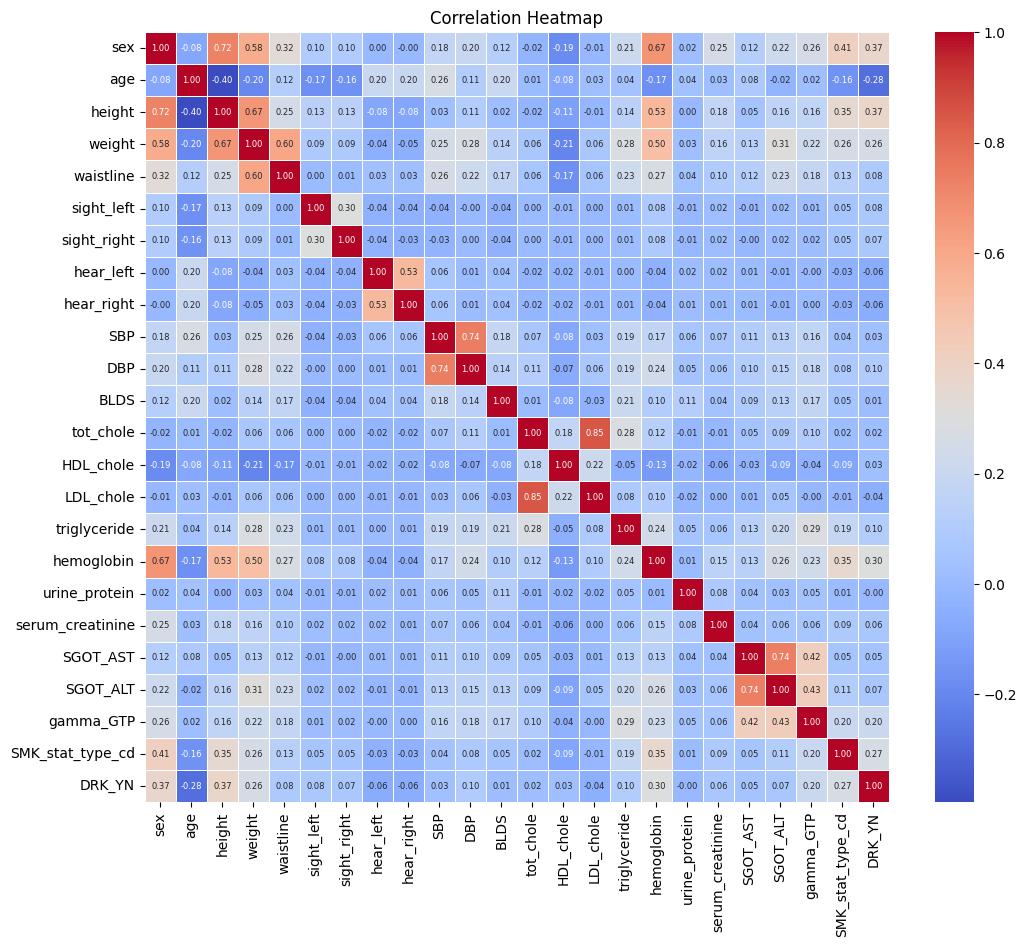

In [ ]:
correlation_matrix = df1.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5, annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data_points = df.shape[0]
print(data_points)

180265


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df1.drop(['SMK_stat_type_cd', 'DRK_YN'], axis =1)
y_drink = df1['DRK_YN']
y_smoke = df1['SMK_stat_type_cd']

X_train, X_test, y_drink_train, y_drink_test, y_smoke_train, y_smoke_test = train_test_split(X, y_drink, y_smoke, test_size= 0.3, random_state= 42)

ros_drink = RandomOverSampler(random_state=42)
X_train_resampled_drink , y_train_resampled_drink = ros_drink.fit_resample(X_train, y_drink_train)

ros_smoke = RandomOverSampler(random_state=42)
X_train_resampled_smoke , y_train_resampled_smoke = ros_drink.fit_resample(X_train, y_smoke_train)

scaler_drink = StandardScaler()
X_train_standardized_drink = scaler_drink.fit_transform(X_train_resampled_drink)

scaler_smoke = StandardScaler()
X_train_standardized_smoke = scaler_smoke.fit_transform(X_train_resampled_smoke)

X_test_standarized_drink = scaler_drink.transform(X_test)
X_test_standarized_smoke = scaler_smoke.transform(X_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors =3)
knn_classifier.fit(X_train_standardized_drink, y_train_resampled_drink)

knn_pred_drink = knn_classifier.predict(X_test_standarized_drink)

knn_accuracy_drink = accuracy_score(y_drink_test, knn_pred_drink)
class_report_drink = classification_report(y_drink_test, knn_pred_drink)

print("\nFor Drinking Prediction:")
print(f'Accuracy: {knn_accuracy_drink:.4f}')
print('\nClassification Report:')
print(class_report_drink)

knn_classifier = KNeighborsClassifier(n_neighbors =3)
knn_classifier.fit(X_train_standardized_drink, y_train_resampled_drink)

knn_pred_smoke = knn_classifier.predict(X_test_standarized_drink)

knn_accuracy_smoke = accuracy_score(y_smoke_test, knn_pred_smoke)
class_report_smoke = classification_report(y_smoke_test, knn_pred_smoke)

print("\nFor Smoking Prediction:")
print(f'Accuracy: {knn_accuracy_smoke:.4f}')
print('\nClassification Report:')
print(class_report_smoke)


For Drinking Prediction:
Accuracy: 0.6630

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     27054
           1       0.66      0.67      0.67     27026

    accuracy                           0.66     54080
   macro avg       0.66      0.66      0.66     54080
weighted avg       0.66      0.66      0.66     54080


For Smoking Prediction:
Accuracy: 0.6009

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69     42439
           1       0.32      0.76      0.45     11641

    accuracy                           0.60     54080
   macro avg       0.61      0.66      0.57     54080
weighted avg       0.77      0.60      0.64     54080



In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_standardized_drink, y_train_resampled_drink)

nb_pred_drink = naive_bayes_classifier.predict(X_test_standarized_drink)

nb_accuracy_drink = accuracy_score(y_drink_test, nb_pred_drink)
class_report_drink = classification_report(y_drink_test, nb_pred_drink)

print("\nFor Drinking Prediction:")
print(f'Accuracy: {nb_accuracy_drink:.4f}')
print('\nClassification Report:')
print(class_report_drink)

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_standardized_smoke, y_train_resampled_smoke)

nb_pred_smoke = naive_bayes_classifier.predict(X_test_standarized_smoke)

nb_accuracy_smoke = accuracy_score(y_smoke_test, nb_pred_smoke)
class_report_smoke = classification_report(y_smoke_test, nb_pred_smoke)

print("\nFor Smoking Prediction:")
print(f'Accuracy: {nb_accuracy_smoke:.4f}')
print('\nClassification Report:')
print(class_report_smoke)



For Drinking Prediction:
Accuracy: 0.6718

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65     27054
           1       0.65      0.74      0.69     27026

    accuracy                           0.67     54080
   macro avg       0.67      0.67      0.67     54080
weighted avg       0.67      0.67      0.67     54080


For Smoking Prediction:
Accuracy: 0.6907

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.66      0.77     42439
           1       0.39      0.82      0.53     11641

    accuracy                           0.69     54080
   macro avg       0.66      0.74      0.65     54080
weighted avg       0.81      0.69      0.72     54080



In [ ]:
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_standardized_drink, y_train_resampled_drink)

logreg_pred_drink = logreg_classifier.predict(X_test_standarized_drink)

logreg_accuracy_drink = accuracy_score(y_drink_test, logreg_pred_drink)
class_report = classification_report(y_drink_test, logreg_pred_drink)

print("\nFor Drinking Prediction:")
print(f'Accuracy: {logreg_accuracy_drink:.4f}')
print('\nClassification Report:')
print(class_report)

logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_standardized_smoke, y_train_resampled_smoke)

logreg_pred_smoke = logreg_classifier.predict(X_test_standarized_smoke)

logreg_accuracy_smoke = accuracy_score(y_smoke_test, logreg_pred_smoke)
class_report = classification_report(y_smoke_test, logreg_pred_smoke)

print("\nFor Smoking Prediction:")
print(f'Accuracy: {logreg_accuracy_smoke:.4f}')
print('\nClassification Report:')
print(class_report)


For Drinking Prediction:
Accuracy: 0.7183

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     27054
           1       0.72      0.71      0.72     27026

    accuracy                           0.72     54080
   macro avg       0.72      0.72      0.72     54080
weighted avg       0.72      0.72      0.72     54080


For Smoking Prediction:
Accuracy: 0.7013

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     42439
           1       0.41      0.88      0.56     11641

    accuracy                           0.70     54080
   macro avg       0.68      0.76      0.67     54080
weighted avg       0.83      0.70      0.73     54080



In [ ]:
models = ['KNN',  'Naive Bayes',  'Logistic Regression']

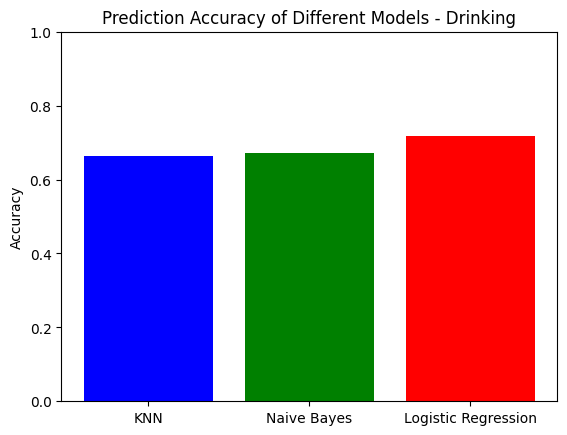

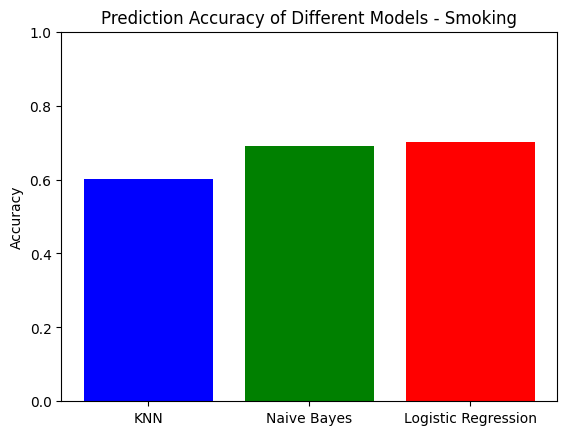

In [ ]:
accuracies_1 = [knn_accuracy_drink, nb_accuracy_drink, logreg_accuracy_drink]
plt.bar(models, accuracies_1, color = ['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models - Drinking')
plt.show()

accuracies_2 = [knn_accuracy_smoke, nb_accuracy_smoke, logreg_accuracy_smoke]
plt.bar(models, accuracies_2, color = ['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models - Smoking')
plt.show()

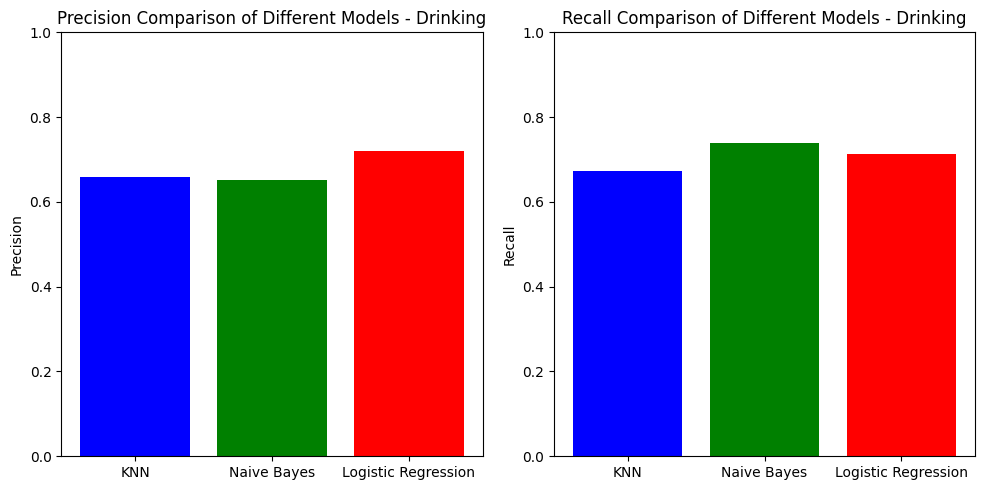

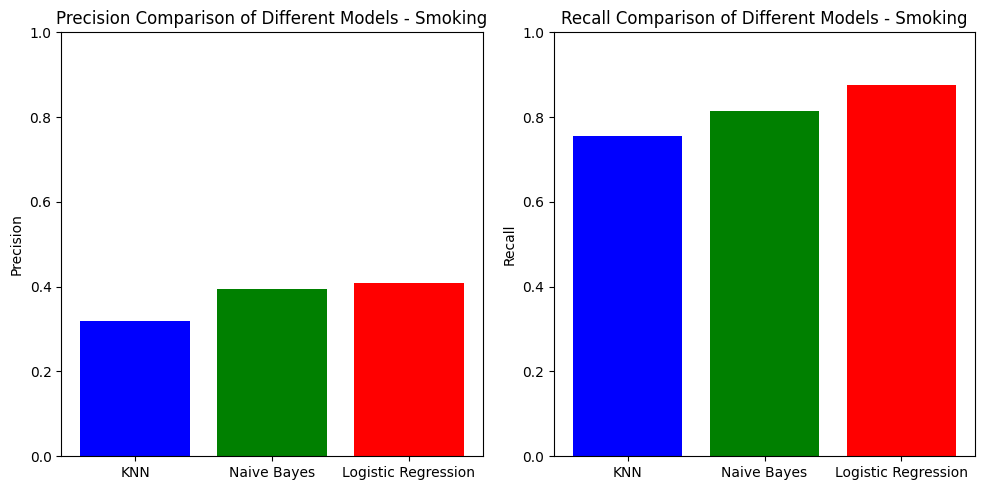

In [ ]:
knn_precision_1 = precision_score(y_drink_test, knn_pred_drink)
knn_recall_1 = recall_score(y_drink_test, knn_pred_drink)

knn_precision_2 = precision_score(y_smoke_test, knn_pred_smoke)
knn_recall_2 = recall_score(y_smoke_test, knn_pred_smoke)

nb_precision_1 = precision_score(y_drink_test, nb_pred_drink)
nb_recall_1 = recall_score(y_drink_test, nb_pred_drink)

nb_precision_2 = precision_score(y_smoke_test, nb_pred_smoke)
nb_recall_2 = recall_score(y_smoke_test, nb_pred_smoke)

logreg_precision_1 = precision_score(y_drink_test, logreg_pred_drink)
logreg_recall_1 = recall_score(y_drink_test, logreg_pred_drink)

logreg_precision_2 = precision_score(y_smoke_test, logreg_pred_smoke)
logreg_recall_2 = recall_score(y_smoke_test, logreg_pred_smoke)

precisions_1 = [knn_precision_1,  nb_precision_1, logreg_precision_1 ]
recalls_1 = [ knn_recall_1,  nb_recall_1,  logreg_recall_1]
precisions_2 = [knn_precision_2,  nb_precision_2, logreg_precision_2 ]
recalls_2 = [ knn_recall_2,  nb_recall_2,  logreg_recall_2]




fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(models, precisions_1, color=['blue', 'green', 'red'])
ax1.set_ylim(0, 1)
ax1.set_ylabel('Precision')
ax1.set_title('Precision Comparison of Different Models - Drinking')

ax2.bar(models, recalls_1, color=['blue', 'green', 'red'])
ax2.set_ylim(0, 1)
ax2.set_ylabel('Recall')
ax2.set_title('Recall Comparison of Different Models - Drinking')

plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(models, precisions_2, color=['blue', 'green', 'red'])
ax1.set_ylim(0, 1)
ax1.set_ylabel('Precision')
ax1.set_title('Precision Comparison of Different Models - Smoking')

ax2.bar(models, recalls_2, color=['blue', 'green', 'red'])
ax2.set_ylim(0, 1)
ax2.set_ylabel('Recall')
ax2.set_title('Recall Comparison of Different Models - Smoking')

plt.tight_layout()
plt.show()

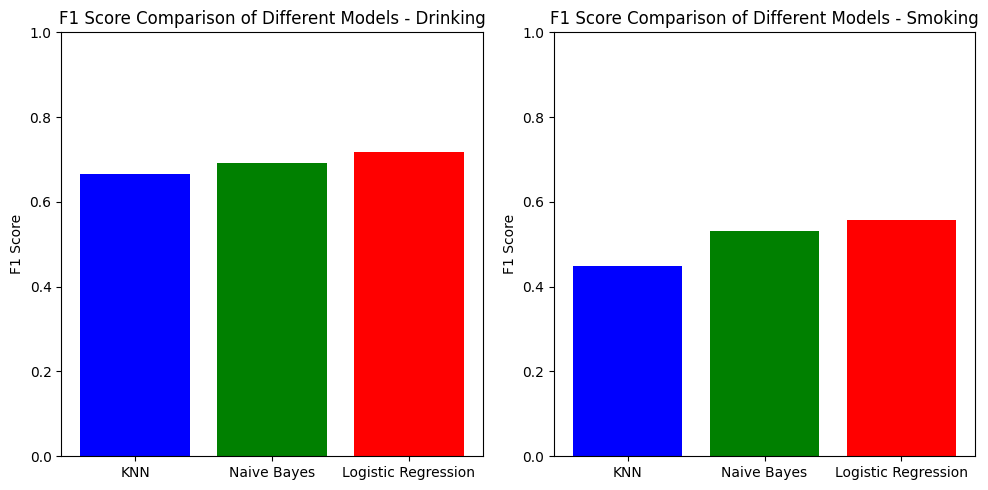

In [ ]:
knn_f1_score_1 = f1_score(y_drink_test, knn_pred_drink)

knn_f1_score_2 = f1_score(y_smoke_test, knn_pred_smoke)

nb_f1_score_1 = f1_score(y_drink_test, nb_pred_drink)

nb_f1_score_2 = f1_score(y_smoke_test, nb_pred_smoke)

logreg_f1_score_1 = f1_score(y_drink_test, logreg_pred_drink)

logreg_f1_score_2 = f1_score(y_smoke_test, logreg_pred_smoke)

f1_score_1 = [knn_f1_score_1,  nb_f1_score_1, logreg_f1_score_1 ]
f1_score_2 = [knn_f1_score_2,  nb_f1_score_2, logreg_f1_score_2 ]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(models, f1_score_1, color=['blue', 'green', 'red'])
ax1.set_ylim(0, 1)
ax1.set_ylabel('F1 Score')
ax1.set_title('F1 Score Comparison of Different Models - Drinking')

ax2.bar(models, f1_score_2, color=['blue', 'green', 'red'])
ax2.set_ylim(0, 1)
ax2.set_ylabel('F1 Score')
ax2.set_title('F1 Score Comparison of Different Models - Smoking')

plt.tight_layout()
plt.show()



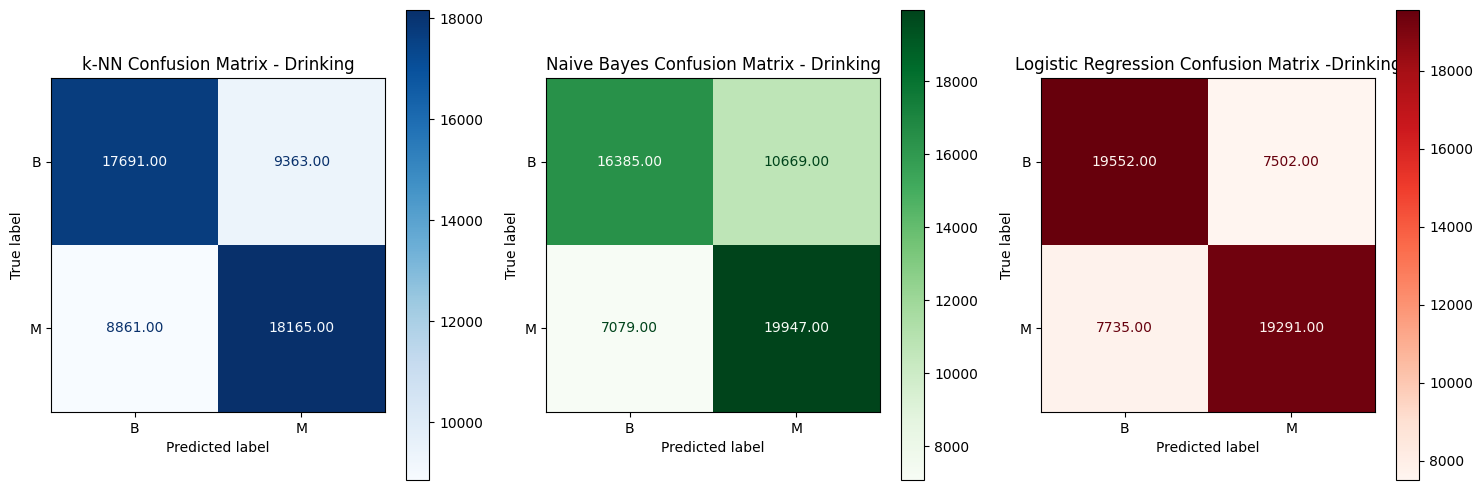

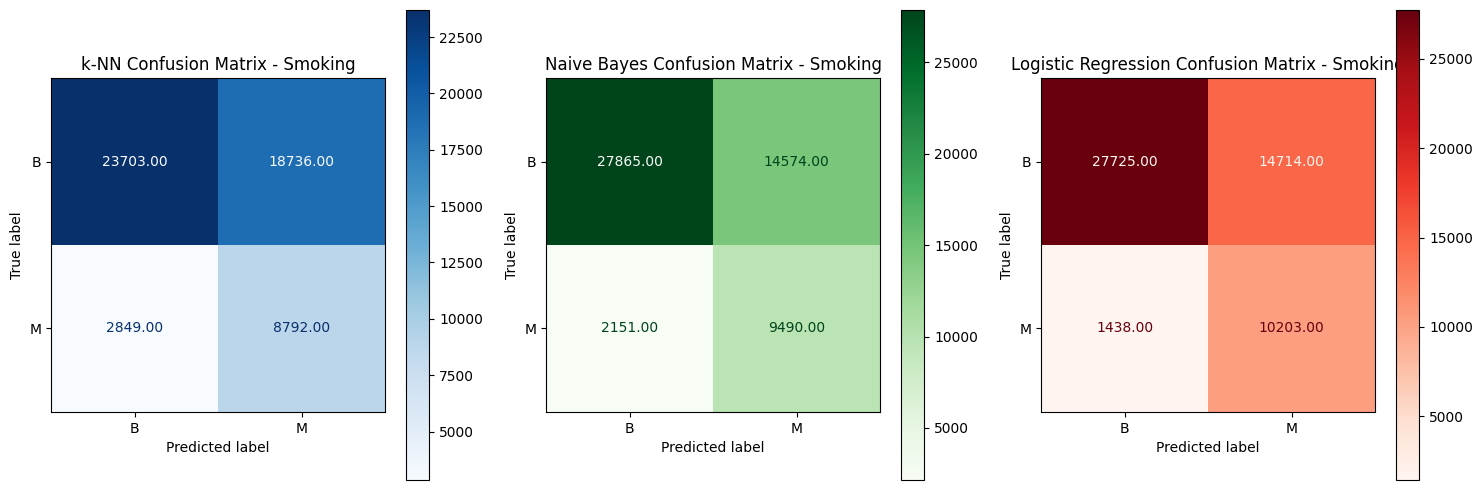

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
knn_conf_matrix_1 = confusion_matrix(y_drink_test, knn_pred_drink)
nb_conf_matrix_1 = confusion_matrix(y_drink_test, nb_pred_drink)
logreg_conf_matrix_1 = confusion_matrix(y_drink_test, logreg_pred_drink)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

disp_knn_1 = ConfusionMatrixDisplay(knn_conf_matrix_1, display_labels = ['B', 'M'])
disp_knn_1.plot(ax = axes[0], cmap = plt.cm.Blues, values_format = '.2f')
axes[0].set_title('k-NN Confusion Matrix - Drinking')

disp_nb_1 = ConfusionMatrixDisplay(nb_conf_matrix_1, display_labels = ['B', 'M'])
disp_nb_1.plot(ax = axes[1], cmap = plt.cm.Greens, values_format = '.2f')
axes[1].set_title('Naive Bayes Confusion Matrix - Drinking')

disp_logreg_1 = ConfusionMatrixDisplay(logreg_conf_matrix_1, display_labels = ['B', 'M'])
disp_logreg_1.plot(ax = axes[2], cmap = plt.cm.Reds, values_format = '.2f')
axes[2].set_title('Logistic Regression Confusion Matrix -Drinking')

plt.tight_layout()
plt.show()

knn_conf_matrix_2 = confusion_matrix(y_smoke_test, knn_pred_smoke)
nb_conf_matrix_2 = confusion_matrix(y_smoke_test, nb_pred_smoke)
logreg_conf_matrix_2 = confusion_matrix(y_smoke_test, logreg_pred_smoke)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

disp_knn_2 = ConfusionMatrixDisplay(knn_conf_matrix_2, display_labels = ['B', 'M'])
disp_knn_2.plot(ax = axes[0], cmap = plt.cm.Blues, values_format = '.2f')
axes[0].set_title('k-NN Confusion Matrix - Smoking')

disp_nb_2 = ConfusionMatrixDisplay(nb_conf_matrix_2, display_labels = ['B', 'M'])
disp_nb_2.plot(ax = axes[1], cmap = plt.cm.Greens, values_format = '.2f')
axes[1].set_title('Naive Bayes Confusion Matrix - Smoking')

disp_logreg_2 = ConfusionMatrixDisplay(logreg_conf_matrix_2, display_labels = ['B', 'M'])
disp_logreg_2.plot(ax = axes[2], cmap = plt.cm.Reds, values_format = '.2f')
axes[2].set_title('Logistic Regression Confusion Matrix - Smoking')

plt.tight_layout()
plt.show()